Seaborn and its advantages:
- Built on top of Matplotlib
- Default themes are still attractive
- Simple to use especially for analysis
- Declarative API helps us to just focus on the granular elements of the chart 

Down Side:
- Leads to out of memory issues especially while creating multiple figures
- Doesn't support many customizations

Import required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Preparing Dataset

In [2]:
# Data from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
heart_failure_data = pd.read_csv('../Data/heart_failure_clinical_records_dataset.csv')
heart_failure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
agg_data = heart_failure_data.groupby(['age', 'DEATH_EVENT'], as_index=False).ejection_fraction.count()
agg_data.columns = ['Age', 'Death_Event', 'Count']
agg_data.head()

,Age,Death_Event,Count
0,40,0,7
1,41,0,1
2,42,0,6
3,42,1,1
4,43,0,1


Trend Chart

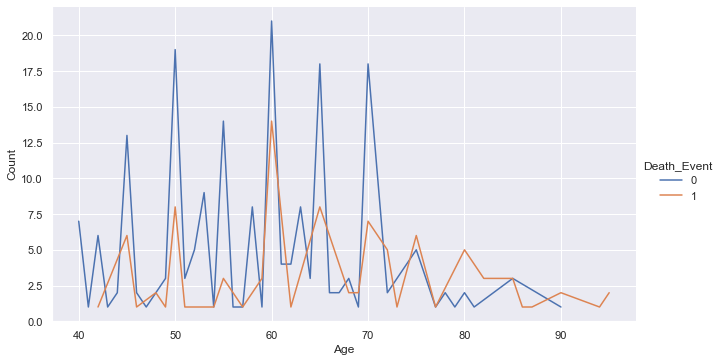

In [4]:
sns.relplot(x="Age", y="Count", 
            hue="Death_Event" , aspect=16/9,
            kind="line", data=agg_data);

Scatter Plot

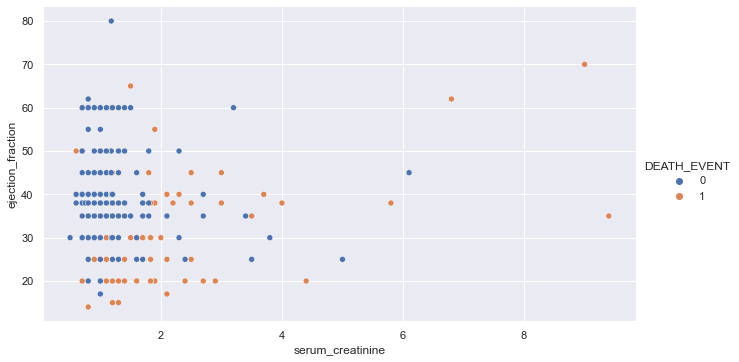

In [5]:
sns.relplot(x="serum_creatinine", y="ejection_fraction", 
            hue="DEATH_EVENT", kind="scatter", # Kind is optional
            data=heart_failure_data, aspect=16/9);

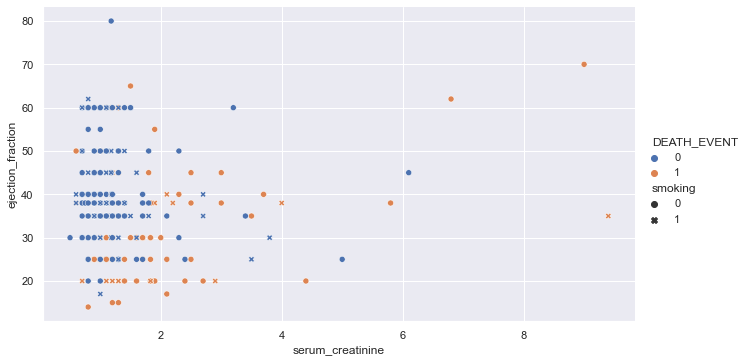

In [6]:
sns.relplot(x="serum_creatinine", y="ejection_fraction", 
            hue="DEATH_EVENT", kind="scatter", # Kind is optional
            style="smoking",
            data=heart_failure_data, aspect=16/9);

Heatmap

In [ ]:
agg_data2 = heart_failure_data.groupby(['age', 'ejection_fraction'], as_index=False).DEATH_EVENT.sum()
agg_data2.columns = ['Age', 'ejection_fraction', 'Deaths']
agg_data2_p = agg_data2.pivot(index='Age', columns='ejection_fraction', values='Deaths')
agg_data2_p.fillna(0, inplace=True)
agg_data2_p.head(20)

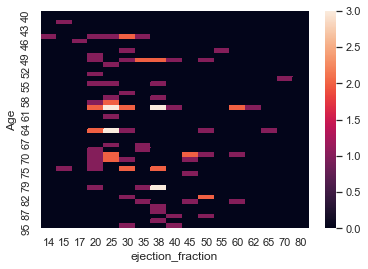

In [8]:
sns.heatmap(agg_data2_p)
plt.show()

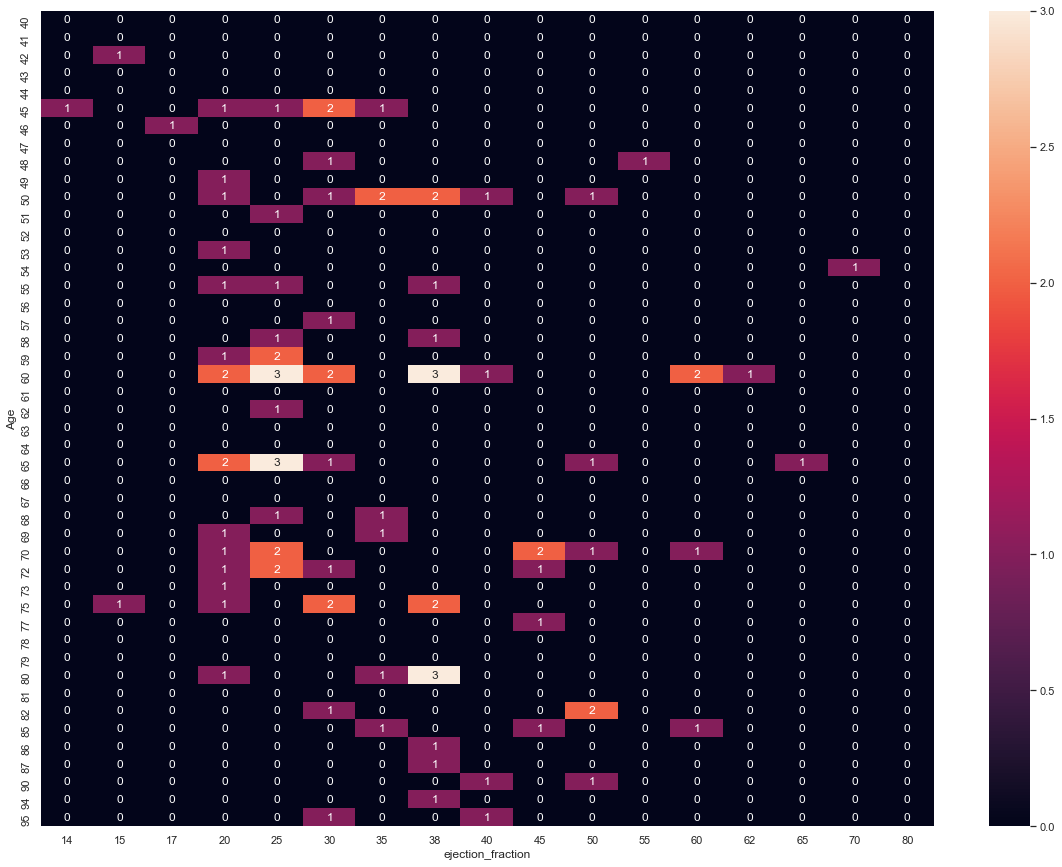

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(agg_data2_p, annot=True)
plt.show()

Pair Plot

In [10]:
subset = heart_failure_data.iloc[:,[0,1,2,3,4]]
subset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction
0,75,0,582,0,20
1,55,0,7861,0,38
2,65,0,146,0,20
3,50,1,111,0,20
4,65,1,160,1,20


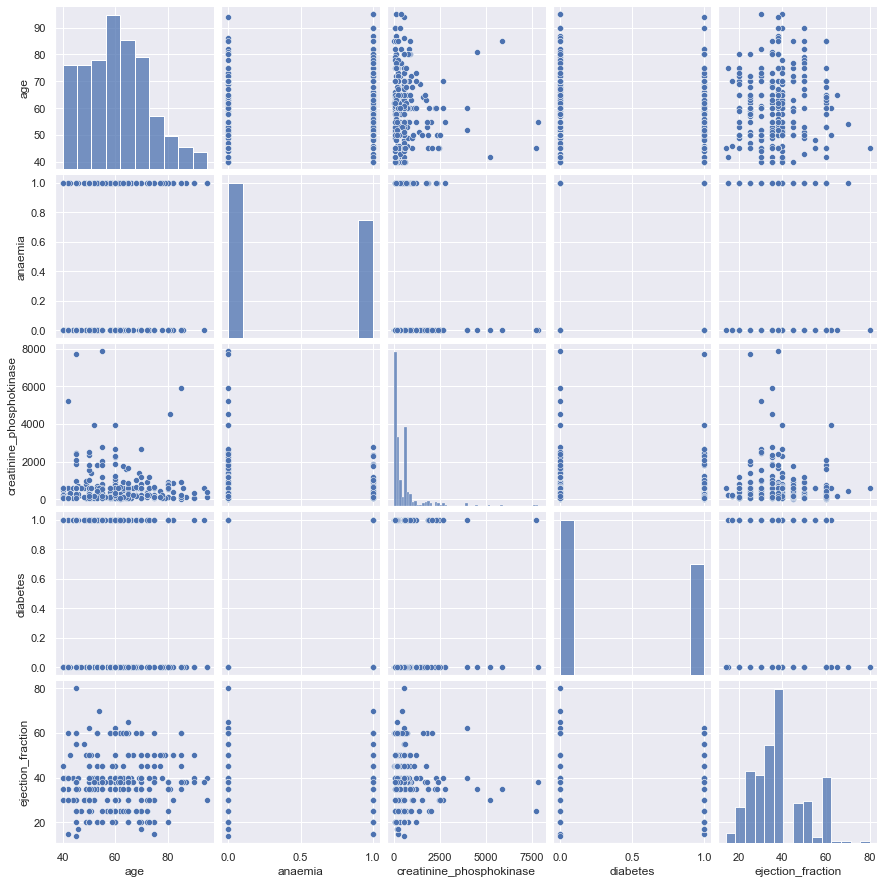

In [11]:
sns.pairplot(subset)

Interactive Plots 

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.iris import flowers

#colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
#colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Age Vs Ejection Fraction")
p.xaxis.axis_label = 'Age'
p.yaxis.axis_label = 'Ejection Fraction'

p.circle(agg_data2["Age"], agg_data2["ejection_fraction"],
         fill_alpha=0.2, size=10)

output_file("test.html", title="Example")

show(p)

#### To Try
- Use the below datasets, modify the data as required and repeat all the chart covered today <br>
Datasets:<br>
https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset<br>
https://www.kaggle.com/ronitf/heart-disease-uci